# MNIST

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [131]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"] + data["gn"].astype(str)
        if "LR" in path:
            data["LR"] = float(path.split("LR")[1][:3])
        else:
            data["LR"] = 0.1
        if "G00" in path:
            data["Mode"] = "G00"
        elif "G11" in path:
            data["Mode"] = "G11"
        elif "2L00G1B11" in path:
            data["Mode"] = "2L00G1B11"
        elif "2L00G1" in path:
            data["Mode"] = "2L00G1"
        elif "L00G1" in path:
            data["Mode"] = "L00G1"
        elif "L02G1" in path:
            data["Mode"] = "L02G1"
        # elif "L01G1" in path:
        #     data["Mode"] = "L01G1"
        elif "L10" in path:
            data["Mode"] = "L10"
        # elif "L11" in path:
        #     data["Mode"] = "L11"
        elif "L20" in path:
            data["Mode"] = "L20"
        elif "L02" in path:
            data["Mode"] = "L02"
        elif "L22" in path:
            data["Mode"] = "L22"
        elif "3LN_Fonly" in path:
            data["Mode"] = "3LN_Fonly"
        # elif "L12" in path:
            # data["Mode"] = "L12"
        # elif "L21" in path:
        #     data["Mode"] = "L21"
        else:
            continue
        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

In [132]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-fedavg-*-P0.01*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # data_temp['Mode'] = data_temp['Mode'] .map({'fedavg0': "FedAvg", 
    #                                             'fedprox0': "FedProx", 
    #                                             'scaffold0': "Scaffold",  
    #                                             'feddyn0': "FedDyn", 
    #                                             'G11': "FedGN",
    #                                            })
    print(data_temp["Mode"].unique())
    sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['G00', 'G11', "L01", "L02", "L10", "L11", "L12", "L20", "L21", "L22", "L00G1"]
    sk = ['G00', 'G11', "L10", "L02", "L20", "L22", "L00G1", "L02G1", "2L00G1", "2L00G1B11"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp

In [1]:
data_temp = load_data()
print(data_temp.shape)
fig, axes = plt.subplots(1, 1, figsize=(8,5), dpi=150, sharey=True)
sns.set_style("darkgrid")
ax = axes
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.2)]
temp = temp[temp["Distribution"] == "Balanced IID partition"]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="sd")

ax = axes
ax.set_xlabel("Communication rounds"), ax.set_ylabel("Test accuracy (%)"), 
axes.legend(title="Distribution", loc=4, prop={'size': 9}),
fig.tight_layout()

NameError: name 'load_data' is not defined

42000
['G00' 'L00G1' 'L10' '3LN_Fonly']


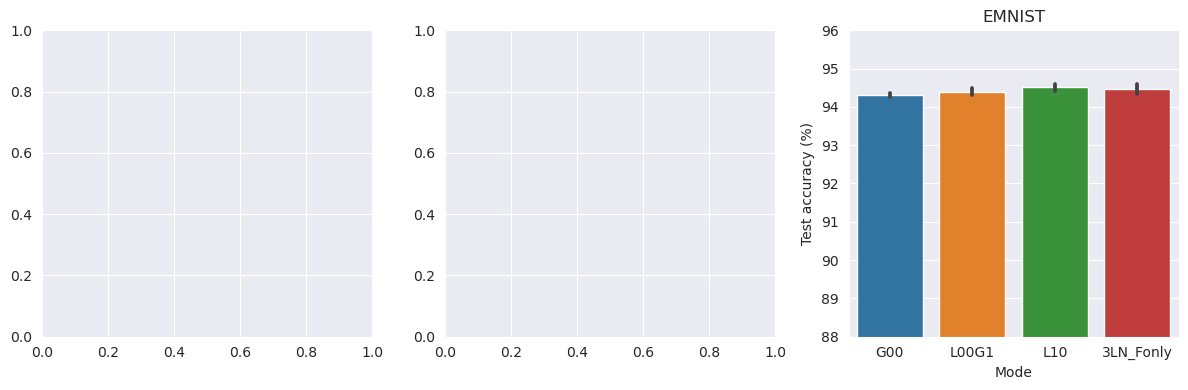

In [156]:
def load_data(task):
    datas = list()
    save_path = "../Output/{}-fedavg-*-P0.01*/s[1-9].csv".format(task)
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # print(data_temp["Mode"].unique())
    sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['G00', 'G11', "L01", "L02", "L10", "L11", "L12", "L20", "L21", "L22", "L00G1"]
    sk = ['G00', "L00G1",  "L10",  "3LN_Fonly"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp


fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi=100, sharey=False)
sns.set_style("darkgrid")

# data_temp = load_data("CIFAR100")
# ax = axes[0]
# temp = copy.deepcopy(data_temp)
# temp = temp[temp["Distribution"] == "Balanced IID partition"]
# temp = temp[temp["act_prob"] == .01]
# temp = temp[temp["epoch"] == 499]
# temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1")]
# temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
# ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
# ax.set_title("CIFAR-100"), ax.set_ylabel("Test accuracy (%)"), ax.set_ylim([36,54])

# data_temp = load_data("CIFAR10noBN2")
# ax = axes[1]
# temp = copy.deepcopy(data_temp)
# temp = temp[temp["Distribution"] == "Balanced IID partition"]
# temp = temp[temp["act_prob"] == .01]
# temp = temp[temp["epoch"] == 499]
# temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1")]
# temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
# ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
# ax.set_title("CIFAR-10"), ax.set_ylabel("Test accuracy (%)"), ax.set_ylim([70,88])

data_temp = load_data("emnist")
ax = axes[2]
temp = copy.deepcopy(data_temp)
print(temp["Mode"].unique())
temp = temp[temp["Distribution"] == "Balanced IID partition"]
# temp = temp[temp["Distribution"] == "Balanced Dirichlet partition (α=0.3)"]
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] == 399]
temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1") | (temp["Mode"] == "3LN_Fonly")]

# temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
ax.set_title("EMNIST"), ax.set_ylabel("Test accuracy (%)"), 
ax.set_ylim([88, 96])

fig.tight_layout()

['G11' 'L00G1' 'L10' 'L20' 'L02G1' '2L00G1B11' '2L00G1' 'L22' 'L02' 'G00']
27384
['G11' 'L10' 'G00' 'L00G1']
22050
['G11' 'G00' '3LN_Fonly' 'L00G1' 'L10']
25200


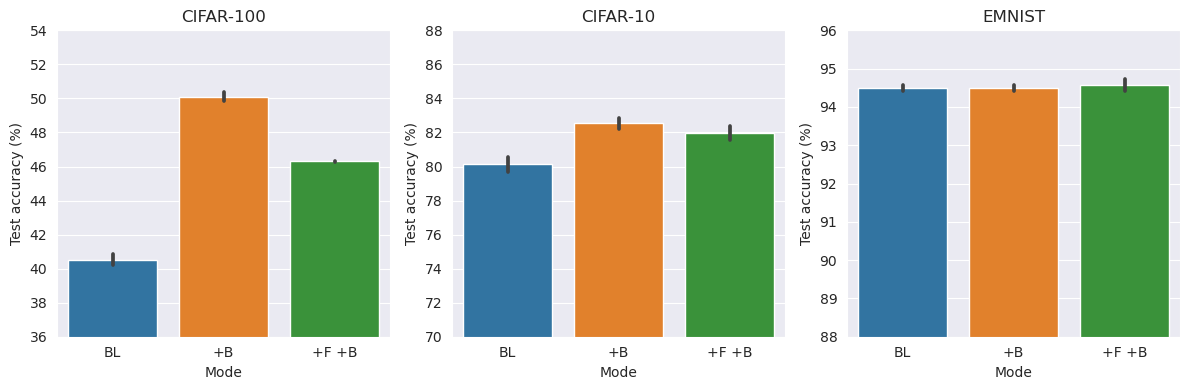

In [149]:
def load_data(task):
    datas = list()
    save_path = "../Output/{}-fedavg-*-P0.01*/s[1-9].csv".format(task)
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    print(data_temp["Mode"].unique())
    sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['G00', 'G11', "L01", "L02", "L10", "L11", "L12", "L20", "L21", "L22", "L00G1"]
    sk = ['G00', "L00G1",  "L10"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp


fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi=100, sharey=False)
sns.set_style("darkgrid")

data_temp = load_data("CIFAR100")
ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["Distribution"] == "Balanced IID partition"]
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] == 499]
temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1")]
temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
ax.set_title("CIFAR-100"), ax.set_ylabel("Test accuracy (%)"), ax.set_ylim([36,54])

data_temp = load_data("CIFAR10noBN2")
ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["Distribution"] == "Balanced IID partition"]
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] == 499]
temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1")]
temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
ax.set_title("CIFAR-10"), ax.set_ylabel("Test accuracy (%)"), ax.set_ylim([70,88])

data_temp = load_data("emnist")
ax = axes[2]
temp = copy.deepcopy(data_temp)
temp = temp[temp["Distribution"] == "Balanced IID partition"]
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] == 499]
temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1")]
temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
ax.set_title("EMNIST"), ax.set_ylabel("Test accuracy (%)"), ax.set_ylim([88, 96])

fig.tight_layout()

['G11' 'L00G1' 'L10' 'L20' 'L02G1' '2L00G1B11' '2L00G1' 'L22' 'L02' 'G00']
28350
['L00G1' 'G11' 'L10' 'G00']
28350


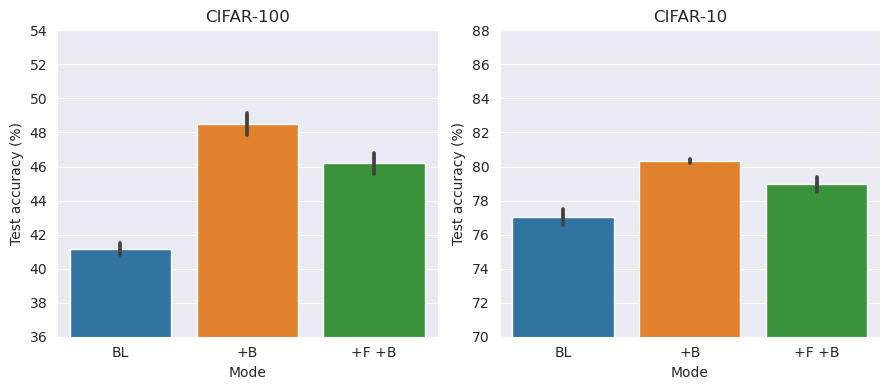

In [155]:
def load_data(task):
    datas = list()
    save_path = "../Output/{}-fedavg-*-P0.01*/s[1-9].csv".format(task)
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    print(data_temp["Mode"].unique())
    sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['G00', 'G11', "L01", "L02", "L10", "L11", "L12", "L20", "L21", "L22", "L00G1"]
    sk = ['G00', "L00G1",  "L10"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp


fig, axes = plt.subplots(1, 2, figsize=(9,4), dpi=100, sharey=False)
sns.set_style("darkgrid")

epoch = 499
data_temp = load_data("CIFAR100")
ax = axes[0]
temp = copy.deepcopy(data_temp)
# temp = temp[temp["Distribution"] == "Balanced IID partition"]
temp = temp[temp["Distribution"] == "Balanced Dirichlet partition (α=0.3)"]
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] == epoch]
temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1")]
temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
ax.set_title("CIFAR-100"), ax.set_ylabel("Test accuracy (%)"), 
ax.set_ylim([36,54])

data_temp = load_data("CIFAR10noBN2")
ax = axes[1]
temp = copy.deepcopy(data_temp)
# temp = temp[temp["Distribution"] == "Balanced IID partition"]
temp = temp[temp["Distribution"] == "Balanced Dirichlet partition (α=0.3)"]

temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] == epoch]
temp = temp[(temp["Mode"] == "G00") | (temp["Mode"] == "L10") | (temp["Mode"] == "L20") | (temp["Mode"] == "L00G1")]
temp['Mode'] = temp['Mode'] .map({'G00': "BL", 'L00G1':"+B", 'L10': "+F +B", })
ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, errorbar="sd")
ax.set_title("CIFAR-10"), ax.set_ylabel("Test accuracy (%)"), 
ax.set_ylim([70,88])

fig.tight_layout()